lstm6

결과요약: RMSE: 0.15565380454063416  sales를 log를 취한 후 normalize한다.

seed 7: [step: 499] loss: 1.981953740119934
RMSE: 0.15565380454063416

seed 77: [step: 499] loss: 2.095550537109375
RMSE: 0.1802239865064621

시도 내용 요약:
주중(1)/주말(2) + 겨울(1)봄(2)여름(3)가을(4) // 

이미 lstm이라는 것이 sequence 개념이 있으므로 시간축(1~397)를 feature로 설정하는 것은 의미가 없을 듯 하여 제외함

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import pandas as pd
tf.set_random_seed(77)


In [2]:
columns=['date','sales']

txs=pd.read_table('./lstmData/lstmPrac3.csv', sep=',',header=None,names=columns )
txs.info()
txs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
date     397 non-null object
sales    397 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


,date,sales
0,2016-01-01,34
1,2016-01-02,41
2,2016-01-03,54
3,2016-01-04,41
4,2016-01-05,35


In [3]:
from datetime import datetime                    

# 1. 기본 feature

In [4]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year  
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
# please read docs on how week numbers are calculate
week_number = lambda x: datetime.strptime(x, "%Y-%m-%d" ).strftime('%V')

# 2. 추가 feature

In [5]:
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]

In [6]:
txs['year'] = txs['date'].map(year)
txs['month']=txs['date'].map(month)
txs['week_number']=txs['date'].map(week_number)
txs['season']=txs['date'].map(season)
txs['day_of_week']=txs['date'].map(day_of_week)
txs

,date,sales,year,month,week_number,season,day_of_week
0,2016-01-01,34,2016,1,53,0,4
1,2016-01-02,41,2016,1,53,0,5
2,2016-01-03,54,2016,1,53,0,6
3,2016-01-04,41,2016,1,01,0,0
4,2016-01-05,35,2016,1,01,0,1
5,2016-01-06,44,2016,1,01,0,2
6,2016-01-07,50,2016,1,01,0,3
7,2016-01-08,42,2016,1,01,0,4
8,2016-01-09,42,2016,1,01,0,5
9,2016-01-10,66,2016,1,01,0,6


pandas를 통해 구한 각 feature는 list()로 우리의 기준type인 list로 변경이 가능

# 3. 추가 가공

## 3.1 y의 추가 가공

In [7]:
xySales=txs['sales']
xySales=list(xySales)

### 이상점 제거

이상점 제거의 기준이 무척 주관적일 수 있으므로 제외하는 것이 좋을 수도 있어 lstm6는 이상점 제거를 하지 않았다.

normalization, bucketization 을 하여 새로운 열을 생성하는 방향으로

### log

In [8]:
xySales=np.log(xySales)
xySales

array([ 3.52636052,  3.71357207,  3.98898405,  3.71357207,  3.55534806,
        3.78418963,  3.91202301,  3.73766962,  3.73766962,  4.18965474,
        3.91202301,  4.00733319,  4.02535169,  3.97029191,  3.78418963,
        3.98898405,  3.98898405,  3.91202301,  3.68887945,  3.8918203 ,
        3.33220451,  4.27666612,  4.26267988,  3.97029191,  3.76120012,
        3.63758616,  4.00733319,  3.8918203 ,  3.76120012,  3.8918203 ,
        3.8918203 ,  3.78418963,  3.66356165,  3.95124372,  3.80666249,
        3.49650756,  3.76120012,  3.68887945,  3.8286414 ,  3.8918203 ,
        3.91202301,  3.61091791,  3.61091791,  3.80666249,  3.87120101,
        3.87120101,  3.63758616,  4.09434456,  3.4339872 ,  3.55534806,
        3.97029191,  4.24849524,  4.12713439,  3.87120101,  3.93182563,
        3.8918203 ,  3.63758616,  3.4657359 ,  3.66356165,  3.55534806,
        3.40119738,  3.58351894,  3.4339872 ,  3.4339872 ,  3.78418963,
        3.71357207,  3.71357207,  3.80666249,  3.8286414 ,  3.80

### Normalization

In [9]:
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)

In [10]:
xySales=MinMaxScaler(xySales)

## 합쳐서 최종 input XY생성

In [11]:
tempxy=[list(txs['season']),list(txs['day_of_week']),list(txs['week_number']),xySales]

In [12]:
tempxy

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [13]:
xy=np.array(tempxy)

In [14]:
xy

array([['0', '0', '0', ..., '0', '0', '0'],
       ['4', '5', '6', ..., '6', '0', '1'],
       ['53', '53', '53', ..., '04', '05', '05'],
       ['0.5557142370799633', '0.5852166429054146', '0.6286184327116974',
        ..., '0.0', '0.2536290760381732', '0.5411572543878042']], 
      dtype='<U32')

In [15]:
temp=xy.transpose()

In [16]:
temp

array([['0', '4', '53', '0.5557142370799633'],
       ['0', '5', '53', '0.5852166429054146'],
       ['0', '6', '53', '0.6286184327116974'],
       ..., 
       ['0', '6', '04', '0.0'],
       ['0', '0', '05', '0.2536290760381732'],
       ['0', '1', '05', '0.5411572543878042']], 
      dtype='<U32')

In [17]:
xy = temp.astype(np.float)

In [18]:
xy

array([[  0.        ,   4.        ,  53.        ,   0.55571424],
       [  0.        ,   5.        ,  53.        ,   0.58521664],
       [  0.        ,   6.        ,  53.        ,   0.62861843],
       ..., 
       [  0.        ,   6.        ,   4.        ,   0.        ],
       [  0.        ,   0.        ,   5.        ,   0.25362908],
       [  0.        ,   1.        ,   5.        ,   0.54115725]])

[[  0.           4.          53.           0.55571424]
 [  0.           5.          53.           0.58521664]
 [  0.           6.          53.           0.62861843]
 [  0.           0.           1.           0.58521664]
 [  0.           1.           1.           0.56028234]
 [  0.           2.           1.           0.59634517]
 [  0.           3.           1.           0.61649025]] -> [ 0.58901414]
[[  0.           5.          53.           0.58521664]
 [  0.           6.          53.           0.62861843]
 [  0.           0.           1.           0.58521664]
 [  0.           1.           1.           0.56028234]
 [  0.           2.           1.           0.59634517]
 [  0.           3.           1.           0.61649025]
 [  0.           4.           1.           0.58901414]] -> [ 0.58901414]
[[  0.           6.          53.           0.62861843]
 [  0.           0.           1.           0.58521664]
 [  0.           1.           1.           0.56028234]
 [  0.           2.          

 [ 0.          2.          6.          0.61649025]] -> [ 0.56903952]
[[ 0.          4.          5.          0.55100975]
 [ 0.          5.          5.          0.59272228]
 [ 0.          6.          5.          0.58132537]
 [ 0.          0.          6.          0.60335026]
 [ 0.          1.          6.          0.61330653]
 [ 0.          2.          6.          0.61649025]
 [ 0.          3.          6.          0.56903952]] -> [ 0.56903952]
[[ 0.          5.          5.          0.59272228]
 [ 0.          6.          5.          0.58132537]
 [ 0.          0.          6.          0.60335026]
 [ 0.          1.          6.          0.61330653]
 [ 0.          2.          6.          0.61649025]
 [ 0.          3.          6.          0.56903952]
 [ 0.          4.          6.          0.56903952]] -> [ 0.59988663]
[[ 0.          6.          5.          0.58132537]
 [ 0.          0.          6.          0.60335026]
 [ 0.          1.          6.          0.61330653]
 [ 0.          2.          6

 [  3.           0.          37.           0.58521664]] -> [ 0.55571424]
[[  3.           2.          36.           0.52511746]
 [  3.           3.          36.           0.50082507]
 [  3.           4.          36.           0.58901414]
 [  3.           5.          36.           0.51343889]
 [  3.           6.          36.           0.46401003]
 [  3.           0.          37.           0.58521664]
 [  3.           1.          37.           0.55571424]] -> [ 0.32769629]
[[  3.           3.          36.           0.50082507]
 [  3.           4.          36.           0.58901414]
 [  3.           5.          36.           0.51343889]
 [  3.           6.          36.           0.46401003]
 [  3.           0.          37.           0.58521664]
 [  3.           1.          37.           0.55571424]
 [  3.           2.          37.           0.32769629]] -> [ 0.]
[[  3.           4.          36.           0.58901414]
 [  3.           5.          36.           0.51343889]
 [  3.           6.

[step: 37] loss: 3.297848701477051
[step: 38] loss: 3.3047101497650146
[step: 39] loss: 3.311000347137451
[step: 40] loss: 3.3134052753448486
[step: 41] loss: 3.3097708225250244
[step: 42] loss: 3.299191951751709
[step: 43] loss: 3.2819268703460693
[step: 44] loss: 3.2592012882232666
[step: 45] loss: 3.2329132556915283
[step: 46] loss: 3.2052814960479736
[step: 47] loss: 3.1784772872924805
[step: 48] loss: 3.1542985439300537
[step: 49] loss: 3.133927345275879
[step: 50] loss: 3.117790937423706
[step: 51] loss: 3.105562210083008
[step: 52] loss: 3.096285104751587
[step: 53] loss: 3.088603973388672
[step: 54] loss: 3.081047534942627
[step: 55] loss: 3.0723230838775635
[step: 56] loss: 3.0615665912628174
[step: 57] loss: 3.048506736755371
[step: 58] loss: 3.0335259437561035
[step: 59] loss: 3.0175914764404297
[step: 60] loss: 3.002065658569336
[step: 61] loss: 2.9883737564086914
[step: 62] loss: 2.977536201477051
[step: 63] loss: 2.9696385860443115
[step: 64] loss: 2.9635050296783447
[ste

[step: 290] loss: 2.4871084690093994
[step: 291] loss: 2.4852454662323
[step: 292] loss: 2.483365058898926
[step: 293] loss: 2.4814682006835938
[step: 294] loss: 2.4795546531677246
[step: 295] loss: 2.477623701095581
[step: 296] loss: 2.4756760597229004
[step: 297] loss: 2.4737119674682617
[step: 298] loss: 2.4717297554016113
[step: 299] loss: 2.4697320461273193
[step: 300] loss: 2.467717170715332
[step: 301] loss: 2.465686559677124
[step: 302] loss: 2.4636385440826416
[step: 303] loss: 2.4615750312805176
[step: 304] loss: 2.459495782852173
[step: 305] loss: 2.4574010372161865
[step: 306] loss: 2.4552905559539795
[step: 307] loss: 2.4531657695770264
[step: 308] loss: 2.451026201248169
[step: 309] loss: 2.4488728046417236
[step: 310] loss: 2.4467051029205322
[step: 311] loss: 2.4445245265960693
[step: 312] loss: 2.4423305988311768
[step: 313] loss: 2.440124988555908
[step: 314] loss: 2.4379076957702637
[step: 315] loss: 2.4356791973114014
[step: 316] loss: 2.4334397315979004
[step: 317]

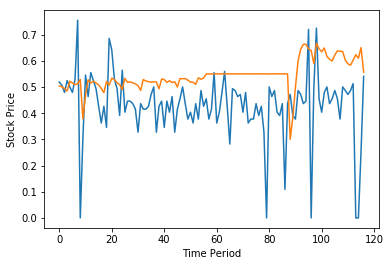

[step: 0] loss: 115.8022232055664
[step: 1] loss: 34.572261810302734
[step: 2] loss: 6.50014591217041
[step: 3] loss: 6.157736778259277
[step: 4] loss: 8.509627342224121
[step: 5] loss: 9.816115379333496
[step: 6] loss: 10.05495834350586
[step: 7] loss: 9.600061416625977
[step: 8] loss: 8.79328727722168
[step: 9] loss: 7.87939453125
[step: 10] loss: 6.999103546142578
[step: 11] loss: 6.2119879722595215
[step: 12] loss: 5.532166004180908
[step: 13] loss: 4.957820892333984
[step: 14] loss: 4.4860639572143555
[step: 15] loss: 4.116079807281494
[step: 16] loss: 3.847053050994873
[step: 17] loss: 3.6751809120178223
[step: 18] loss: 3.5916006565093994
[step: 19] loss: 3.5816903114318848
[step: 20] loss: 3.625810146331787
[step: 21] loss: 3.701279640197754
[step: 22] loss: 3.785165786743164
[step: 23] loss: 3.8572652339935303
[step: 24] loss: 3.902606725692749
[step: 25] loss: 3.9129412174224854
[step: 26] loss: 3.8869428634643555
[step: 27] loss: 3.8292553424835205
[step: 28] loss: 3.7486984

[step: 240] loss: 2.5617823600769043
[step: 241] loss: 2.5605337619781494
[step: 242] loss: 2.5592806339263916
[step: 243] loss: 2.5580227375030518
[step: 244] loss: 2.5567595958709717
[step: 245] loss: 2.555490016937256
[step: 246] loss: 2.5542151927948
[step: 247] loss: 2.552934408187866
[step: 248] loss: 2.5516464710235596
[step: 249] loss: 2.550351858139038
[step: 250] loss: 2.5490493774414062
[step: 251] loss: 2.5477399826049805
[step: 252] loss: 2.5464224815368652
[step: 253] loss: 2.5450961589813232
[step: 254] loss: 2.5437614917755127
[step: 255] loss: 2.5424180030822754
[step: 256] loss: 2.541064500808716
[step: 257] loss: 2.539701223373413
[step: 258] loss: 2.538328170776367
[step: 259] loss: 2.5369441509246826
[step: 260] loss: 2.5355494022369385
[step: 261] loss: 2.5341429710388184
[step: 262] loss: 2.532724380493164
[step: 263] loss: 2.531294345855713
[step: 264] loss: 2.5298521518707275
[step: 265] loss: 2.5283961296081543
[step: 266] loss: 2.5269272327423096
[step: 267] 

RMSE: 0.1802239865064621


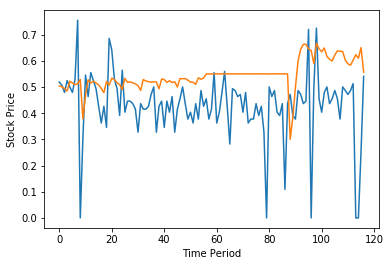

In [19]:
#train parameters
seq_length=7
data_dim=4
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500
#기본형식
#기본 인자로는 ds-y로 받고 
#처리함수에서 ds를 받아서 'feature 처리모듈'에서 ds에서 요일(주중, 주말), 월(계절) + 날씨와 같은 추가 요인-값을 받는다.


x=xy
y=xy[:,[-1]]

#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

#input place holders
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, 1])
# build a LSTM network(input: cell shape, type/ )
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# use the last cell's output to calculate Y_pred
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=tf.tanh) 
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()


In [20]:
testY

array([[ 0.51938634],
       [ 0.50725815],
       [ 0.47978204],
       [ 0.52511746],
       [ 0.50082507],
       [ 0.47978204],
       [ 0.53064745],
       [ 0.75576194],
       [ 0.        ],
       [ 0.30665327],
       [ 0.54616049],
       [ 0.46401003],
       [ 0.55571424],
       [ 0.52511746],
       [ 0.49411816],
       [ 0.42675785],
       [ 0.36286117],
       [ 0.42675785],
       [ 0.34625756],
       [ 0.68656767],
       [ 0.64257344],
       [ 0.53064745],
       [ 0.49411816],
       [ 0.39159297],
       [ 0.56472175],
       [ 0.40420679],
       [ 0.44648214],
       [ 0.44648214],
       [ 0.43692839],
       [ 0.41588536],
       [ 0.32769629],
       [ 0.43692839],
       [ 0.41588536],
       [ 0.41588536],
       [ 0.42675785],
       [ 0.47209327],
       [ 0.50082507],
       [ 0.32769629],
       [ 0.42675785],
       [ 0.44648214],
       [ 0.34625756],
       [ 0.44648214],
       [ 0.40420679],
       [ 0.46401003],
       [ 0.32769629],
       [ 0

In [21]:
dataY

[array([ 0.58901414]),
 array([ 0.58901414]),
 array([ 0.66024185]),
 array([ 0.61649025]),
 array([ 0.63151005]),
 array([ 0.63434956]),
 array([ 0.62567277]),
 array([ 0.59634517]),
 array([ 0.62861843]),
 array([ 0.62861843]),
 array([ 0.61649025]),
 array([ 0.58132537]),
 array([ 0.61330653]),
 array([ 0.52511746]),
 array([ 0.67395385]),
 array([ 0.67174978]),
 array([ 0.62567277]),
 array([ 0.59272228]),
 array([ 0.57324213]),
 array([ 0.63151005]),
 array([ 0.61330653]),
 array([ 0.59272228]),
 array([ 0.61330653]),
 array([ 0.61330653]),
 array([ 0.59634517]),
 array([ 0.57733557]),
 array([ 0.62267099]),
 array([ 0.59988663]),
 array([ 0.55100975]),
 array([ 0.59272228]),
 array([ 0.58132537]),
 array([ 0.60335026]),
 array([ 0.61330653]),
 array([ 0.61649025]),
 array([ 0.56903952]),
 array([ 0.56903952]),
 array([ 0.59988663]),
 array([ 0.61005717]),
 array([ 0.61005717]),
 array([ 0.57324213]),
 array([ 0.64522205]),
 array([ 0.54115725]),
 array([ 0.56028234]),
 array([ 0.